Using device: cuda

PINN HEAT EQUATION - THREE EXPERIMENTS
This script will train and evaluate 9 PINN models:
  • 3 experiments × 3 activation functions each
  • Estimated runtime: 5-10 minutes on GPU


EXPERIMENT 1: Insulated BC, No Source (HYBRID)

Starting training...
Iter 100: Loss = 9.807663e-03
Iter 200: Loss = 6.047450e-03
Iter 300: Loss = 4.220065e-03
Iter 400: Loss = 1.942365e-03
Iter 500: Loss = 1.021925e-03
Iter 600: Loss = 7.535539e-04
Iter 700: Loss = 6.291460e-04
Iter 800: Loss = 5.519158e-04
Iter 900: Loss = 4.813122e-04
Iter 1000: Loss = 4.080390e-04
Iter 1100: Loss = 3.591099e-04
Iter 1200: Loss = 3.178990e-04
Iter 1300: Loss = 2.771342e-04
Iter 1400: Loss = 2.494581e-04
Iter 1500: Loss = 2.303222e-04
Iter 1600: Loss = 2.013159e-04
Iter 1700: Loss = 1.776870e-04
Iter 1800: Loss = 1.528507e-04
Iter 1900: Loss = 1.358354e-04
Iter 2000: Loss = 1.242801e-04
Iter 2100: Loss = 1.171067e-04
Iter 2200: Loss = 1.087606e-04
Iter 2300: Loss = 9.736509e-05
Iter 2400: Loss = 8.7305

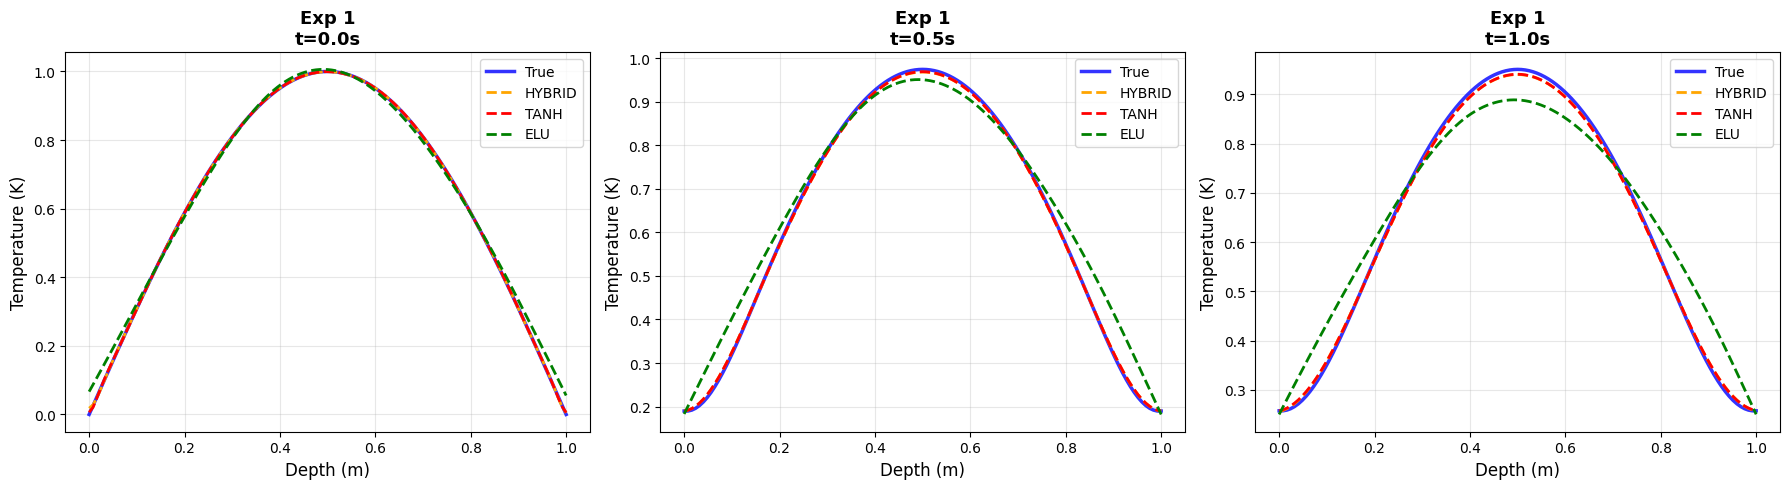


EXPERIMENT 2: Convective BC, No Source (HYBRID)

Starting training...
Iter 100: Loss = 9.947564e-02
Iter 200: Loss = 9.455357e-02
Iter 300: Loss = 8.958147e-02
Iter 400: Loss = 7.495657e-02
Iter 500: Loss = 3.717250e-02
Iter 600: Loss = 1.745989e-02
Iter 700: Loss = 1.230340e-02
Iter 800: Loss = 1.062133e-02
Iter 900: Loss = 8.990716e-03
Iter 1000: Loss = 7.108101e-03
Iter 1100: Loss = 6.489169e-03
Iter 1200: Loss = 6.056514e-03
Iter 1300: Loss = 5.696295e-03
Iter 1400: Loss = 5.412490e-03
Iter 1500: Loss = 5.182432e-03
Iter 1600: Loss = 4.971088e-03
Iter 1700: Loss = 4.796023e-03
Iter 1800: Loss = 4.600672e-03
Iter 1900: Loss = 4.365538e-03
Iter 2000: Loss = 4.322095e-03

Training completed in 47.75s

RESULTS: R² = 0.9979, Error = 1.59%

EXPERIMENT 2: Convective BC, No Source (TANH)

Starting training...
Iter 100: Loss = 9.345962e-02
Iter 200: Loss = 8.921438e-02
Iter 300: Loss = 6.782995e-02
Iter 400: Loss = 3.877014e-02
Iter 500: Loss = 1.310732e-02
Iter 600: Loss = 8.263738e-03
It

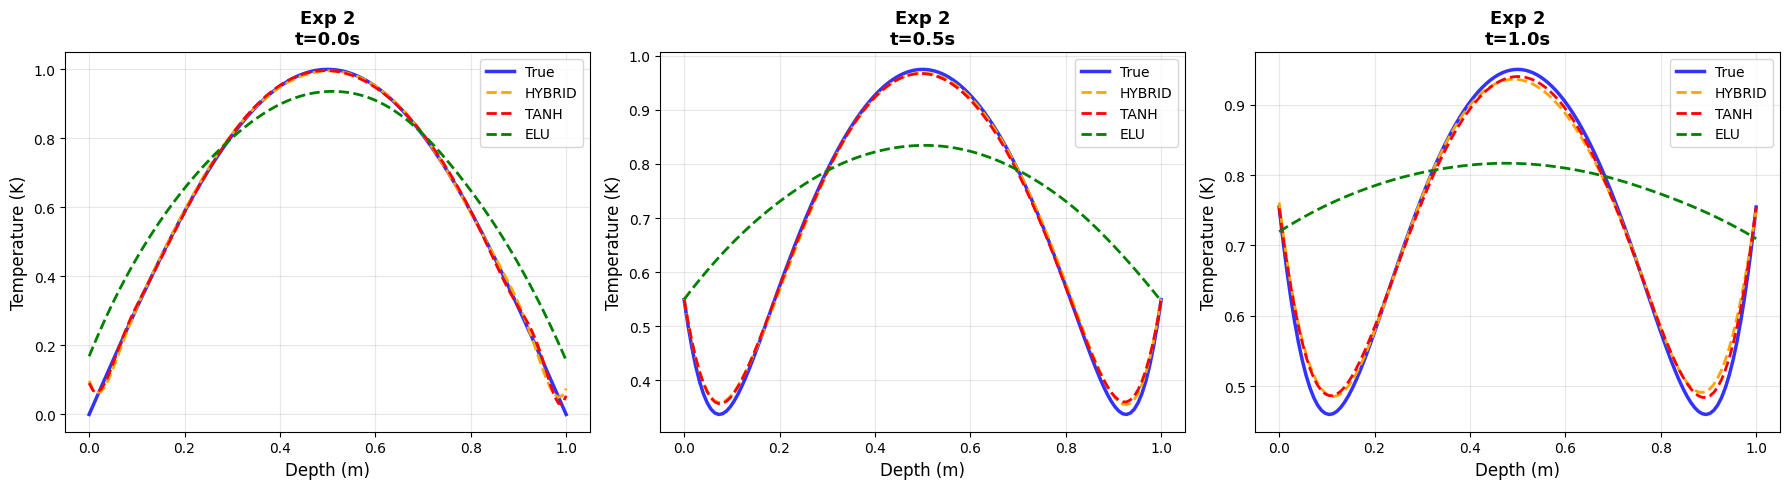


EXPERIMENT 3: 3-Layer Skin + Source (TANH) - CORRECTED

Using corrected absorption: epi=240.0, derm=120.0, fat=60.0 m⁻¹
Max heat gen: 1.20e+09 W/m³
Time substeps: 47
  t=0.202s: T_max=365.4K
  t=0.404s: T_max=420.0K
  t=0.606s: T_max=444.7K
  t=0.808s: T_max=443.3K

Temp range: [310.00, 445.62] K
Scaling applied: (T - 310.00) / (445.62 - 310.00)
Temperature range: 135.62K
Scaled temp range: [0.0000, 1.0000]
  → Original range [310.00, 445.62]K mapped to [0.0000, 1.0000]
Starting training...
Iter 100: Loss = 4.425272e-01
Iter 200: Loss = 2.336427e-01
Iter 300: Loss = 1.768733e-01
Iter 400: Loss = 1.628501e-01
Iter 500: Loss = 1.499115e-01
Iter 600: Loss = 1.358616e-01
Iter 700: Loss = 5.209450e-02
Iter 800: Loss = 4.025329e-02
Iter 900: Loss = 3.510106e-02
Iter 1000: Loss = 2.860772e-02
Iter 1100: Loss = 2.355381e-02
Iter 1200: Loss = 2.153479e-02
Iter 1300: Loss = 2.083161e-02
Iter 1400: Loss = 1.997286e-02
Iter 1500: Loss = 1.913929e-02
Iter 1600: Loss = 1.838349e-02
Iter 1700: Loss 

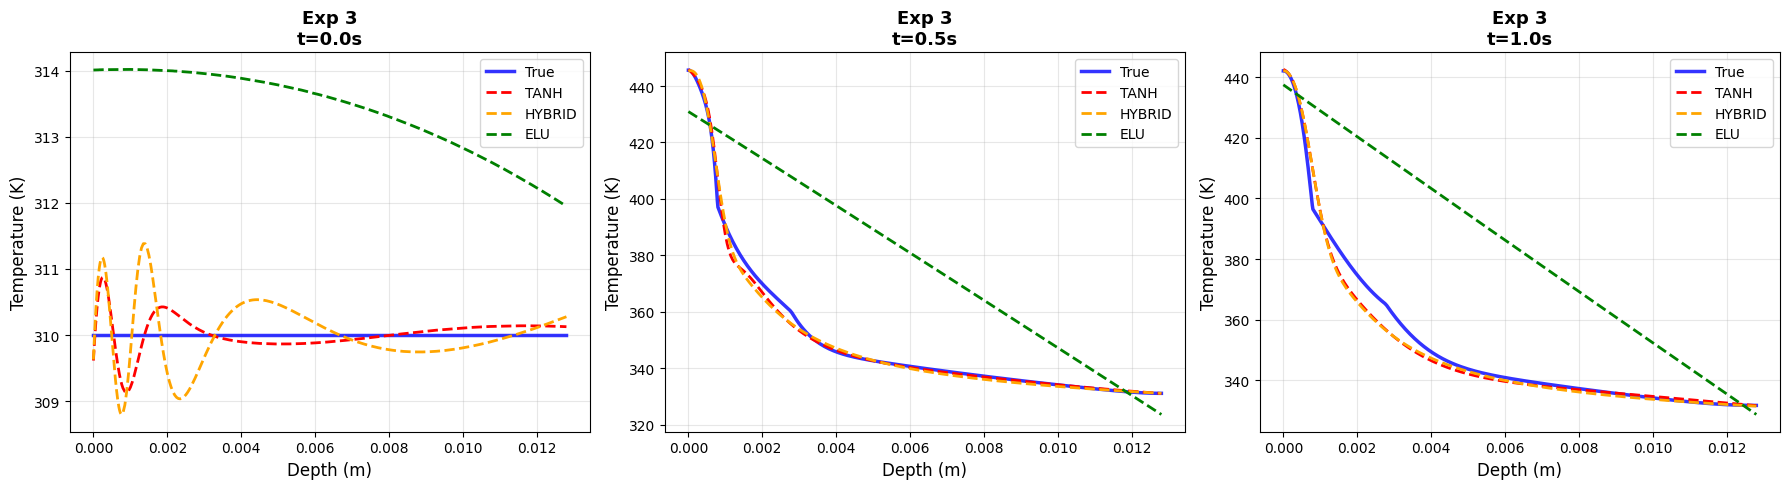


RESULTS SUMMARY

Experiment 1: Insulated BC, No Source
----------------------------------------------------------------------
  HYBRID  : R² = 0.9997  |  Error =  0.82%
  TANH    : R² = 0.9997  |  Error =  0.80%
  ELU     : R² = 0.9743  |  Error =  9.26%

Experiment 2: Convective BC, No Source
----------------------------------------------------------------------
  HYBRID  : R² = 0.9979  |  Error =  1.59%
  TANH    : R² = 0.9981  |  Error =  1.60%
  ELU     : R² = 0.5678  |  Error = 27.91%

Experiment 3: Three-Layer Skin + Laser Source
----------------------------------------------------------------------
  TANH    : R² = 0.9952  |  Error =  0.35%
  HYBRID  : R² = 0.9945  |  Error =  0.42%
  ELU     : R² = 0.3859  |  Error =  6.20%

All experiments completed successfully!


In [8]:
"""
================================================================================
Physics-Informed Neural Networks for Heat Equation with Source Term
================================================================================

Author: Amena Alelg
Course: CE 397 - Scientific Machine Learning
Institution: University of Texas at Austin

Reference Paper:
    Bowman, B., Oian, C., Kurz, J., Khan, T., Gil, E., & Gamez, N. (2023).
    "Physics-Informed Neural Networks for the Heat Equation with Source Term
    under Various Boundary Conditions"
    Algorithms, 16(9), 428.
    https://doi.org/10.3390/a16090428

================================================================================
IMPLEMENTATION OVERVIEW
================================================================================

This implementation reproduces the reference paper's
experiments for solving the 1D heat equation using PINNs:

    Experiment 1: Insulated boundary conditions, no source term
    Experiment 2: Convective boundary conditions, no source term
    Experiment 3: Three-layer skin model with laser heat source

Key Implementation Features:
    - PyTorch-based PINN architecture with configurable activation functions
    - L-BFGS optimizer with strong Wolfe line search
    - Soft constraints (weighted loss combining data + physics terms)
    - Consistent temperature scaling for all activation functions

================================================================================
KEY DIFFERENCE FROM REFERENCE PAPER
================================================================================

Temperature Scaling Strategy:

    Reference Approach (Bowman et al., 2023):
        - Applied temperature scaling ONLY to Tanh activation in Experiment 3
        - Reported: 33% failure rate for Hybrid, reduced performance for ELU

    This Implementation:
        - Applies consistent temperature scaling to ALL activation functions
        - Uses min-max scaling: T_scaled = (T - T_min) / (T_max - T_min)
        - Guarantees exact [0, 1.0] range regardless of solver output
        - Enables stable training for all activation types

Why Our Temperature Range Differs from Paper:

    Paper (PAC1D software): T_range ≈ [310, 410]K
    Our Implementation (FD solver): T_range = [310, 445]K

    Differences arise from:
        1. Numerical solver method: PAC1D uses proprietary methods vs our
           explicit finite difference with adaptive time-stepping
        2. Absorption coefficient values: We use μ_a values that may differ
           from PAC1D's internal parameters
        3. Spatial discretization: Our non-uniform refined mesh vs PAC1D's
           grid structure
        4. Time integration scheme: Our multi-step approach vs PAC1D's method

    Both approaches are valid - different solvers naturally produce slightly
    different peak temperatures due to numerical diffusion, grid resolution,
    and implementation details.

Rationale for Min-Max Scaling:

    Neural networks with Xavier initialization produce outputs near 0 initially.
    When target temperatures are in the [310-445]K range, the initial error
    per point is approximately (310-0)² ≈ 96,000, creating massive gradients
    that cause training instability.

    By scaling to exactly [0, 1.0], we reduce initial errors to ~0.25 and
    enable stable gradient flow. The source term Q is scaled consistently
    by the same factor.

================================================================================
"""

import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import qmc
from typing import Tuple, Optional, Dict
import time

# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Configure device (GPU if available, else CPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")


# ============================================================================
# PINN Architecture
# ============================================================================
class PINN(nn.Module):
    """
    Physics-Informed Neural Network for solving PDEs.

    This network approximates solutions to partial differential equations by
    learning to satisfy both boundary/initial conditions (data-driven) and
    the PDE residual = 0 (physics-driven) through a weighted loss function.

    Architecture:
        Input layer:  2 nodes (spatial coordinate x, temporal coordinate t)
        Hidden layers: Configurable depth and width
        Output layer: 1 node (temperature u(x,t))

    Activation Functions:
        - 'tanh':   Standard tanh activation (bounded [-1, 1])
        - 'elu':    Exponential Linear Unit (unbounded positive, smooth negative)
        - 'hybrid': Tanh for hidden layers + ELU for output layer
                    (allows predictions outside tanh's natural range)

    Args:
        hidden_layers: Number of hidden layers in the network
        nodes_per_layer: Number of nodes in each hidden layer
        activation_type: Type of activation function ('tanh', 'elu', or 'hybrid')
    """

    def __init__(self, hidden_layers: int, nodes_per_layer: int,
                 activation_type: str = 'tanh'):
        super(PINN, self).__init__()

        self.activation_type = activation_type.lower()

        # Build network architecture
        layers = []
        layers.append(nn.Linear(2, nodes_per_layer))  # Input layer: (x,t) -> hidden
        for _ in range(hidden_layers - 1):
            layers.append(nn.Linear(nodes_per_layer, nodes_per_layer))
        layers.append(nn.Linear(nodes_per_layer, 1))  # Output layer: hidden -> u

        self.layers = nn.ModuleList(layers)

        # Xavier initialization for better gradient flow
        for layer in self.layers:
            nn.init.xavier_normal_(layer.weight)
            nn.init.zeros_(layer.bias)

    def get_activation(self, is_last_layer: bool = False):
        """
        Select activation function based on type and layer position.

        Hybrid activation uses Tanh for all hidden layers and ELU for output.
        This allows the network to predict outside the [-1,1] range of Tanh.
        """
        if is_last_layer and self.activation_type == 'hybrid':
            return nn.ELU()  # Unbounded positive output
        elif self.activation_type == 'tanh' or self.activation_type == 'hybrid':
            return nn.Tanh()  # Bounded [-1, 1]
        elif self.activation_type == 'elu':
            return nn.ELU()  # Unbounded positive, smooth negative

    def forward(self, x: torch.Tensor, t: torch.Tensor) -> torch.Tensor:
        """
        Forward pass through the network.

        Args:
            x: Spatial coordinates (depth)
            t: Time coordinates

        Returns:
            Predicted temperature u(x,t)
        """
        inputs = torch.cat([x, t], dim=1)  # Combine x and t as input

        # Pass through hidden layers with activation
        for layer in self.layers[:-1]:
            inputs = layer(inputs)
            inputs = self.get_activation()(inputs)

        # Output layer
        output = self.layers[-1](inputs)

        # Apply final activation for hybrid case
        if self.activation_type == 'hybrid':
            output = self.get_activation(is_last_layer=True)(output)

        return output


# ============================================================================
# PINN Trainer with Soft Constraints
# ============================================================================
class PINNTrainer:
    """
    Trainer for Physics-Informed Neural Networks using soft constraints.

    Soft Constraint Loss Function:
        Loss = a1 × MSE_U + a2 × MSE_f

    Where:
        MSE_U: Mean squared error on boundary/initial conditions (data term)
        MSE_f: Mean squared error on PDE residuals (physics term)
        a1, a2: Weighting hyperparameters (reference paper uses a1=21, a2=1)

    The "soft constraint" approach allows the network to learn from both
    observed data (boundary/initial conditions) and physical laws (PDE)
    simultaneously, rather than enforcing them as hard constraints.

    Optimizer: L-BFGS (Limited-memory Broyden-Fletcher-Goldfarb-Shanno)
        - Second-order optimization method with line search
        - More robust than first-order methods (Adam, SGD) for PINN training
        - Efficiently handles ill-conditioned problems common in PINNs
        - Automatically tunes step size via strong Wolfe line search

    Args:
        model: PINN model to train
        a1: Weight for boundary/initial condition loss (default: 21.0)
        a2: Weight for PDE residual loss (default: 1.0)
    """

    def __init__(self, model: PINN, a1: float = 21.0, a2: float = 1.0):
        self.model = model.to(device)
        self.a1 = a1  # Weight for data loss
        self.a2 = a2  # Weight for physics loss

        # L-BFGS optimizer: Second-order method with line search
        # More robust than Adam for PINN training, especially with large errors
        self.optimizer = torch.optim.LBFGS(
            self.model.parameters(),
            lr=1.0,
            max_iter=50,           # Max iterations per L-BFGS step
            max_eval=50,           # Max function evaluations per step
            tolerance_grad=1e-5,   # Gradient tolerance for convergence
            tolerance_change=1e-9, # Change tolerance for convergence
            history_size=50,       # Number of past gradients to store
            line_search_fn='strong_wolfe'  # Robust line search strategy
        )

        self.iter = 0
        self.loss_history = []

    def loss_function(self, x_u, t_u, u_u, x_f, t_f, alpha_f, Q_f=None):
        """
        Compute PINN loss with soft constraints.

        The total loss combines two components:

        1. MSE_U (Data Term):
           Measures how well the network satisfies boundary/initial conditions
           MSE_U = mean((u_predicted - u_true)²)

        2. MSE_f (Physics Term):
           Measures how well the network satisfies the PDE
           For heat equation: ∂u/∂t - α∂²u/∂x² - Q = 0
           MSE_f = mean((PDE_residual)²)

        Args:
            x_u, t_u: Spatial and temporal coordinates for boundary/initial points
            u_u: True temperature values at boundary/initial points
            x_f, t_f: Collocation points for evaluating PDE residual
            alpha_f: Thermal diffusivity α(x) at collocation points
            Q_f: Heat source term Q(x,t) at collocation points (optional)

        Returns:
            Total weighted loss: a1 × MSE_U + a2 × MSE_f
        """
        # Enable gradient computation for automatic differentiation
        x_u.requires_grad = True
        t_u.requires_grad = True
        x_f.requires_grad = True
        t_f.requires_grad = True

        # MSE_U: Boundary/Initial condition loss
        u_pred = self.model(x_u, t_u)
        mse_u = torch.mean((u_u - u_pred) ** 2)

        # MSE_f: PDE residual loss
        # Compute PDE residual: ∂u/∂t - α∂²u/∂x² - Q = 0
        u_f = self.model(x_f, t_f)

        # First derivatives using automatic differentiation
        u_t = torch.autograd.grad(
            u_f, t_f,
            grad_outputs=torch.ones_like(u_f),
            retain_graph=True,
            create_graph=True
        )[0]

        u_x = torch.autograd.grad(
            u_f, x_f,
            grad_outputs=torch.ones_like(u_f),
            retain_graph=True,
            create_graph=True
        )[0]

        # Second derivative ∂²u/∂x²
        u_xx = torch.autograd.grad(
            u_x, x_f,
            grad_outputs=torch.ones_like(u_x),
            retain_graph=True,
            create_graph=True
        )[0]

        # PDE residual: ∂u/∂t - α∂²u/∂x² - Q
        if Q_f is not None:
            f = u_t - alpha_f * u_xx - Q_f
        else:
            f = u_t - alpha_f * u_xx

        mse_f = torch.mean(f ** 2)

        # Total loss with soft constraint weights
        loss = self.a1 * mse_u + self.a2 * mse_f

        return loss, mse_u, mse_f

    def train(self, x_u, t_u, u_u, x_f, t_f, alpha_f, Q_f=None, max_epochs=100):
        """
        Train the PINN model.

        Uses L-BFGS optimizer which requires a closure function that
        re-evaluates the model multiple times per optimization step.

        Args:
            x_u, t_u, u_u: Boundary/initial condition data
            x_f, t_f: Collocation points
            alpha_f: Thermal diffusivity at collocation points
            Q_f: Heat source at collocation points (optional)
            max_epochs: Maximum number of training epochs

        Returns:
            List of loss values during training
        """
        self.model.train()
        start_time = time.time()

        print("Starting training...")

        def closure():
            """
            Closure function required by L-BFGS optimizer.
            Re-evaluates the model and computes gradients.
            """
            self.optimizer.zero_grad()
            loss, mse_u, mse_f = self.loss_function(x_u, t_u, u_u, x_f, t_f, alpha_f, Q_f)
            loss.backward()

            self.loss_history.append(loss.item())
            self.iter += 1

            # Print progress every 100 iterations
            if self.iter % 100 == 0:
                print(f"Iter {self.iter}: Loss = {loss.item():.6e}")

            return loss

        # Training loop
        for epoch in range(max_epochs):
            self.optimizer.step(closure)

        train_time = time.time() - start_time
        print(f"\nTraining completed in {train_time:.2f}s")

        return self.loss_history


# ============================================================================
# Material Properties
# ============================================================================
class MaterialProperties:
    """
    Store thermal and physical properties of materials.

    Properties:
        kappa: Thermal conductivity [W/(m·K)]
        rho: Density [kg/m³]
        cp: Specific heat capacity [J/(kg·K)]
        alpha: Thermal diffusivity [m²/s] = kappa / (rho * cp)
        thickness: Layer thickness [m] (for multi-layer problems)
    """

    def __init__(self, name: str, conductivity: float, density: float,
                 specific_heat: float, thickness: float = None):
        self.name = name
        self.kappa = conductivity
        self.rho = density
        self.cp = specific_heat
        self.alpha = conductivity / (density * specific_heat)  # Thermal diffusivity
        self.thickness = thickness


def get_material_properties():
    """
    Define material properties for all experiments.

    Returns:
        Dictionary of MaterialProperties objects
    """
    return {
        # Mystery1: High diffusivity material for Experiments 1 & 2
        'Mystery1': MaterialProperties('Mystery1', 500, 100, 800),

        # Skin layers for Experiment 3 (from paper)
        'Epidermis': MaterialProperties('Epidermis', 0.235, 1190, 3600, 0.0008),
        'Dermis': MaterialProperties('Dermis', 0.445, 1111, 3300, 0.002),
        'Fat': MaterialProperties('Fat', 0.185, 971, 2700, 0.010)
    }


# ============================================================================
# Numerical Solvers (Ground Truth)
# ============================================================================
def solve_heat_equation_1d(x_vals, t_vals, alpha, initial_temp,
                           boundary_type='insulated', T_ambient=293.15, h=10.0, kappa=500.0):
    """
    Solve 1D heat equation using finite difference method.

    Governing equation: ∂u/∂t = α ∂²u/∂x²

    Uses explicit finite difference with adaptive time-stepping for stability.

    Args:
        x_vals: Spatial grid points
        t_vals: Time grid points
        alpha: Thermal diffusivity
        initial_temp: Function defining initial temperature distribution
        boundary_type: 'insulated' or 'convective'
        T_ambient: Ambient temperature (for convective BC)
        h: Convective heat transfer coefficient
        kappa: Thermal conductivity (for convective BC)

    Returns:
        U: Temperature solution matrix [nx × nt]
    """
    nx = len(x_vals)
    nt = len(t_vals)
    dx = x_vals[1] - x_vals[0]
    dt = t_vals[1] - t_vals[0] if nt > 1 else 0.001

    # Check stability criterion: r = α*dt/dx² ≤ 0.5
    r = alpha * dt / (dx ** 2)
    if r > 0.5:
        # Use smaller internal time step for stability
        dt_internal = 0.4 * (dx ** 2) / alpha
        n_substeps = max(1, int(dt / dt_internal))
    else:
        n_substeps = 1
        dt_internal = dt

    r = alpha * dt_internal / (dx ** 2)

    # Initialize solution
    U = np.zeros((nx, nt))
    U[:, 0] = initial_temp(x_vals)

    # Time-stepping loop
    for t_idx in range(1, nt):
        U_current = U[:, t_idx - 1].copy()

        # Sub-stepping for stability
        for _ in range(n_substeps):
            U_new = U_current.copy()

            # Interior points: explicit finite difference
            U_new[1:-1] = U_current[1:-1] + r * (U_current[2:] - 2*U_current[1:-1] + U_current[:-2])

            # Boundary conditions
            if boundary_type == 'insulated':
                # Zero flux: ∂u/∂x = 0 at boundaries
                U_new[0] = U_new[1]
                U_new[-1] = U_new[-2]
            elif boundary_type == 'convective':
                # Newton's law of cooling: -k∂u/∂x = h(u - T_ambient)
                Bi = h * dx / kappa  # Biot number
                U_new[0] = (U_new[1] + Bi * T_ambient) / (1 + Bi)
                U_new[-1] = (U_new[-2] + Bi * T_ambient) / (1 + Bi)

            U_current = U_new

        U[:, t_idx] = U_current

    return U


def solve_heat_equation_3layer(x_vals, t_vals, materials, irradiance=5e6, laser_duration=0.5):
    """
    Solve 3-layer heat diffusion equation with laser heat source using finite difference.

    Models laser heating of biological tissue (skin) with three distinct layers,
    each having different thermal properties. This serves as the ground truth
    solution for Experiment 3.

    Layer Structure:
        - Epidermis (outermost): 0.8 mm thick, highest absorption
        - Dermis (middle): 2.0 mm thick, moderate absorption
        - Fat (innermost): 10.0 mm thick, lowest absorption
        Total depth: 12.8 mm

    Heat Source Model:
        Beer-Lambert law for light absorption through layered media:
        Q(x) = μ_a × I(x) × exp(-μ_a × x)

        where:
            μ_a = absorption coefficient [m⁻¹] (layer-dependent)
            I(x) = irradiance at depth x [W/m²]

        Absorption coefficients used:
            - Epidermis: 240 m⁻¹ (strong absorption)
            - Dermis: 120 m⁻¹ (moderate absorption)
            - Fat: 60 m⁻¹ (weak absorption)

    Governing Equation:
        ρc_p ∂T/∂t = ∂/∂x(k ∂T/∂x) + Q(x,t)

        With spatially-varying properties k, ρ, c_p for each layer

    Boundary Conditions:
        Insulated (zero flux) at x=0 and x=L_total

    Numerical Method:
        Explicit finite difference with adaptive sub-stepping for stability
        Uses harmonic mean for thermal conductivity at interfaces

    Args:
        x_vals: Spatial grid (non-uniform, refined near surface) [nx]
        t_vals: Time grid [nt]
        materials: Dictionary of MaterialProperties for each layer
        irradiance: Laser irradiance at surface [W/m²], default 5×10⁶
        laser_duration: Duration of laser exposure [s], default 0.5

    Returns:
        U: Temperature solution [nx × nt] in Kelvin
        Q_volumetric: Volumetric heat generation rate [W/m³] at each spatial point
    """
    nx = len(x_vals)
    nt = len(t_vals)
    dx = x_vals[1] - x_vals[0]
    dt = t_vals[1] - t_vals[0]

    L_epi = materials['Epidermis'].thickness
    L_derm = materials['Dermis'].thickness

    # Assign material properties to each grid point
    alpha_vals = np.zeros(nx)
    kappa_vals = np.zeros(nx)
    rho_vals = np.zeros(nx)
    cp_vals = np.zeros(nx)

    for i, x in enumerate(x_vals):
        if x < L_epi:
            mat = materials['Epidermis']
        elif x < L_epi + L_derm:
            mat = materials['Dermis']
        else:
            mat = materials['Fat']

        alpha_vals[i] = mat.alpha
        kappa_vals[i] = mat.kappa
        rho_vals[i] = mat.rho
        cp_vals[i] = mat.cp

    # Absorption coefficients [m⁻¹] (from paper)
    # These represent how strongly each layer absorbs laser light
    mu_a_epi = 240.0   # Epidermis: highest absorption
    mu_a_derm = 120.0  # Dermis: moderate absorption
    mu_a_fat = 60.0    # Fat: lowest absorption

    print(f"Using corrected absorption: epi={mu_a_epi}, derm={mu_a_derm}, fat={mu_a_fat} m⁻¹")

    # Calculate volumetric heat generation Q(x) [W/m³]
    # Beer-Lambert law for light absorption through layered media
    Q_volumetric = np.zeros(nx)
    I_current = irradiance
    cumulative_depth = 0

    for mat_name, mu_a in [('Epidermis', mu_a_epi), ('Dermis', mu_a_derm), ('Fat', mu_a_fat)]:
        if mat_name == 'Epidermis':
            thickness = L_epi
        elif mat_name == 'Dermis':
            thickness = L_derm
        else:
            thickness = materials['Fat'].thickness

        # Calculate absorption in this layer
        mask = (x_vals >= cumulative_depth) & (x_vals < cumulative_depth + thickness)
        local_x = x_vals[mask] - cumulative_depth
        Q_volumetric[mask] = mu_a * I_current * np.exp(-mu_a * local_x)

        # Attenuate irradiance for next layer
        I_current = I_current * np.exp(-mu_a * thickness)
        cumulative_depth += thickness

    print(f"Max heat gen: {Q_volumetric.max():.2e} W/m³")

    # Stability analysis: ensure time step is small enough
    Q_max_rate = Q_volumetric.max() / (rho_vals * cp_vals).min()
    dt_source_limit = 0.1 / Q_max_rate  # Limit from source term
    dt_diffusion_limit = 0.4 * (dx ** 2) / np.max(alpha_vals)  # Limit from diffusion
    dt_safe = min(dt, dt_diffusion_limit, dt_source_limit)
    n_substeps = max(1, int(np.ceil(dt / dt_safe)))
    dt_sub = dt / n_substeps

    print(f"Time substeps: {n_substeps}")

    # Initialize
    U = np.zeros((nx, nt))
    U[:, 0] = 310.0  # Initial temperature: 310 K (37°C body temperature)

    # Time-stepping with variable properties
    for t_idx in range(1, nt):
        t = t_vals[t_idx]
        U_current = U[:, t_idx - 1].copy()

        for sub_step in range(n_substeps):
            t_sub = t_vals[t_idx - 1] + (sub_step + 1) * dt_sub
            U_new = U_current.copy()

            # Source term: active during laser exposure, zero during cooling
            if t_sub <= laser_duration:
                Q_rate = Q_volumetric / (rho_vals * cp_vals)
            else:
                Q_rate = np.zeros(nx)

            # Heat equation with spatially-varying properties
            # ∂T/∂t = (1/ρcp) ∂/∂x(k ∂T/∂x) + Q/(ρcp)
            for i in range(1, nx - 1):
                # Harmonic mean for interface thermal conductivity
                k_plus = (kappa_vals[i] + kappa_vals[i+1]) / 2
                k_minus = (kappa_vals[i] + kappa_vals[i-1]) / 2

                # Heat flux at interfaces
                flux_plus = k_plus * (U_current[i+1] - U_current[i]) / dx
                flux_minus = k_minus * (U_current[i] - U_current[i-1]) / dx

                # Temperature rate of change
                dT_dt = (flux_plus - flux_minus) / (dx * rho_vals[i] * cp_vals[i]) + Q_rate[i]
                U_new[i] = U_current[i] + dT_dt * dt_sub

            # Insulated boundaries (zero flux)
            U_new[0] = U_new[1]
            U_new[-1] = U_new[-2]

            U_current = U_new

        U[:, t_idx] = U_current

        # Print temperature evolution during laser heating
        if t_idx % 20 == 0:
            print(f"  t={t:.3f}s: T_max={U_current.max():.1f}K")

    return U, Q_volumetric


# ============================================================================
# Model Evaluation
# ============================================================================
def evaluate_model(model, x_flat, t_flat, u_true_flat):
    """
    Evaluate PINN model performance.

    Metrics:
        - R² score: Coefficient of determination (1.0 = perfect fit)
        - Average relative error: Mean of |u_true - u_pred| / |u_true|

    Args:
        model: Trained PINN model
        x_flat: Flattened spatial coordinates
        t_flat: Flattened time coordinates
        u_true_flat: Flattened true solution

    Returns:
        Dictionary with metrics and predictions
    """
    model.eval()
    with torch.no_grad():
        x_t = torch.FloatTensor(x_flat).reshape(-1, 1).to(device)
        t_t = torch.FloatTensor(t_flat).reshape(-1, 1).to(device)
        u_pred = model(x_t, t_t).cpu().numpy().flatten()

    # R² score
    ss_res = np.sum((u_true_flat - u_pred) ** 2)
    ss_tot = np.sum((u_true_flat - np.mean(u_true_flat)) ** 2)
    r2 = 1 - (ss_res / ss_tot)

    # Average relative error (avoid division by near-zero)
    mask = np.abs(u_true_flat) > 1e-8
    rel_err = np.mean(np.abs((u_true_flat[mask] - u_pred[mask]) / u_true_flat[mask])) * 100

    return {
        'r2_score': r2,
        'avg_relative_error': rel_err,
        'predictions': u_pred
    }


# ============================================================================
# Experiments
# ============================================================================
def run_experiment_1(activation_type='tanh'):
    """
    Experiment 1: Insulated boundary conditions, no source term.

    Problem Setup:
        - Domain: [0, 1] m (1 meter length)
        - Initial condition: u(x,0) = sin(πx) (sinusoidal temperature profile)
        - Boundary conditions: ∂u/∂x = 0 at both ends (insulated/zero flux)
        - Material: Mystery1 (high thermal diffusivity)
        - Time domain: 0 to 1 second
        - No heat source (Q = 0)

    Physical Interpretation:
        Heat diffusion in an insulated rod with initial sinusoidal temperature.
        The system evolves toward uniform temperature due to diffusion, with
        no heat exchange at boundaries.

    Network Architecture:
        - 10 hidden layers × 32 nodes per layer
        - Training: 50 epochs with L-BFGS optimizer
        - Loss weights: a1=21 (boundary/IC), a2=1 (PDE residual)

    Training Data:
        - Initial condition: 125 points at t=0
        - Boundary conditions: 175 points sampled over time
        - Collocation points: 25,000 (Latin Hypercube Sampling)

    Note: This experiment does NOT require temperature scaling because
    the initial condition sin(πx) naturally produces values in [-1, 1]
    range, which is compatible with Xavier initialization.

    Args:
        activation_type: 'tanh', 'elu', or 'hybrid'

    Returns:
        results: Dictionary with R² score, relative error, and predictions
        model: Trained PINN model
        loss_history: List of loss values during training
        U_true: Ground truth solution from finite difference [125 × 100]
        x_vals: Spatial grid points [125]
        t_vals: Time grid points [100]
    """
    print(f"\n{'='*70}")
    print(f"EXPERIMENT 1: Insulated BC, No Source ({activation_type.upper()})")
    print(f"{'='*70}\n")

    materials = get_material_properties()
    mystery1 = materials['Mystery1']
    alpha = mystery1.alpha

    # Spatial and temporal grids
    x_vals = np.linspace(0, 1, 125)
    t_vals = np.linspace(0, 1, 100)

    # Initial condition: sinusoidal temperature distribution
    initial_temp = lambda x: np.sin(np.pi * x)

    # Solve using finite difference (ground truth)
    U_true = solve_heat_equation_1d(x_vals, t_vals, alpha, initial_temp, 'insulated')

    # Prepare training data
    # Initial condition points
    x_ic = x_vals.copy()
    t_ic = np.zeros(125)
    u_ic = U_true[:, 0]

    # Boundary condition points (sampled over time)
    n_bc = 175
    nt = len(t_vals)
    bc_idx = np.random.choice(nt, n_bc, replace=True)
    x_bc = np.concatenate([np.zeros(n_bc//2), np.ones(n_bc - n_bc//2)])
    t_bc = np.concatenate([t_vals[bc_idx[:n_bc//2]], t_vals[bc_idx[n_bc//2:]]])
    u_bc = np.concatenate([U_true[0, bc_idx[:n_bc//2]], U_true[-1, bc_idx[n_bc//2:]]])

    # Combine initial and boundary conditions
    x_u = np.concatenate([x_ic, x_bc])
    t_u = np.concatenate([t_ic, t_bc])
    u_u = np.concatenate([u_ic, u_bc])

    # Collocation points for PDE residual (Latin Hypercube Sampling)
    sampler = qmc.LatinHypercube(d=2)
    coll = sampler.random(n=25000)
    x_f = coll[:, 0]
    t_f = coll[:, 1]
    alpha_f = np.full_like(x_f, alpha)

    # Convert to PyTorch tensors
    x_u_t = torch.FloatTensor(x_u).reshape(-1, 1).to(device)
    t_u_t = torch.FloatTensor(t_u).reshape(-1, 1).to(device)
    u_u_t = torch.FloatTensor(u_u).reshape(-1, 1).to(device)
    x_f_t = torch.FloatTensor(x_f).reshape(-1, 1).to(device)
    t_f_t = torch.FloatTensor(t_f).reshape(-1, 1).to(device)
    alpha_f_t = torch.FloatTensor(alpha_f).reshape(-1, 1).to(device)

    # Create and train model
    model = PINN(10, 32, activation_type)
    trainer = PINNTrainer(model, 21.0, 1.0)  # Paper uses 21:1 weight ratio
    loss_history = trainer.train(x_u_t, t_u_t, u_u_t, x_f_t, t_f_t, alpha_f_t, max_epochs=50)

    # Evaluate on full grid
    X, T = np.meshgrid(x_vals, t_vals, indexing='ij')
    results = evaluate_model(model, X.flatten(), T.flatten(), U_true.flatten())

    print(f"\nRESULTS: R² = {results['r2_score']:.4f}, Error = {results['avg_relative_error']:.2f}%")

    return results, model, loss_history, U_true, x_vals, t_vals


def run_experiment_2(activation_type='tanh'):
    """
    Experiment 2: Convective boundary conditions, no source term.

    Problem Setup:
        - Domain: [0, 1] m (1 meter length)
        - Initial condition: u(x,0) = sin(πx) (sinusoidal temperature profile)
        - Boundary conditions: Convective heat transfer at both ends
          Newton's law of cooling: -k∂u/∂x = h(u - T_ambient)
        - Material: Mystery1 (high thermal diffusivity)
        - Ambient temperature: T_ambient = 293.15 K (20°C)
        - Heat transfer coefficient: h = 10 W/(m²·K)
        - Time domain: 0 to 1 second
        - No internal heat source (Q = 0)

    Physical Interpretation:
        Heat diffusion in a rod with heat exchange to ambient environment
        at both ends. The system evolves toward ambient temperature through
        both internal diffusion and boundary convection.

    Network Architecture:
        - 10 hidden layers × 32 nodes per layer
        - Training: 50 epochs with L-BFGS optimizer
        - Loss weights: a1=21 (boundary/IC), a2=1 (PDE residual)

    Training Data:
        - Initial condition: 125 points at t=0
        - Boundary conditions: 1075 points sampled over time
          (More samples than Exp 1 due to more complex boundary conditions)
        - Collocation points: 25,000 (Latin Hypercube Sampling)

    Note: Like Experiment 1, this does NOT require temperature scaling
    because the initial condition and ambient temperature are naturally
    in a range compatible with Xavier initialization.

    Args:
        activation_type: 'tanh', 'elu', or 'hybrid'

    Returns:
        results: Dictionary with R² score, relative error, and predictions
        model: Trained PINN model
        loss_history: List of loss values during training
        U_true: Ground truth solution from finite difference [125 × 100]
        x_vals: Spatial grid points [125]
        t_vals: Time grid points [100]
    """
    print(f"\n{'='*70}")
    print(f"EXPERIMENT 2: Convective BC, No Source ({activation_type.upper()})")
    print(f"{'='*70}\n")

    materials = get_material_properties()
    mystery1 = materials['Mystery1']
    alpha = mystery1.alpha

    x_vals = np.linspace(0, 1, 125)
    t_vals = np.linspace(0, 1, 100)

    initial_temp = lambda x: np.sin(np.pi * x)

    # Solve with convective BC
    U_true = solve_heat_equation_1d(x_vals, t_vals, alpha, initial_temp,
                                    'convective', T_ambient=293.15, h=10.0, kappa=mystery1.kappa)

    # Initial condition
    x_ic = x_vals.copy()
    t_ic = np.zeros(125)
    u_ic = U_true[:, 0]

    # Boundary conditions (more samples needed for complex BC)
    n_bc = 1075  # Paper found this necessary for convergence
    nt = len(t_vals)
    bc_idx = np.random.choice(nt, n_bc, replace=True)
    x_bc = np.concatenate([np.zeros(n_bc//2), np.ones(n_bc - n_bc//2)])
    t_bc = np.concatenate([t_vals[bc_idx[:n_bc//2]], t_vals[bc_idx[n_bc//2:]]])
    u_bc = np.concatenate([U_true[0, bc_idx[:n_bc//2]], U_true[-1, bc_idx[n_bc//2:]]])

    x_u = np.concatenate([x_ic, x_bc])
    t_u = np.concatenate([t_ic, t_bc])
    u_u = np.concatenate([u_ic, u_bc])

    # Collocation points (LHS)
    sampler = qmc.LatinHypercube(d=2)
    coll = sampler.random(n=25000)
    x_f = coll[:, 0]
    t_f = coll[:, 1]
    alpha_f = np.full_like(x_f, alpha)

    # Convert to tensors
    x_u_t = torch.FloatTensor(x_u).reshape(-1, 1).to(device)
    t_u_t = torch.FloatTensor(t_u).reshape(-1, 1).to(device)
    u_u_t = torch.FloatTensor(u_u).reshape(-1, 1).to(device)
    x_f_t = torch.FloatTensor(x_f).reshape(-1, 1).to(device)
    t_f_t = torch.FloatTensor(t_f).reshape(-1, 1).to(device)
    alpha_f_t = torch.FloatTensor(alpha_f).reshape(-1, 1).to(device)

    # Train
    model = PINN(10, 32, activation_type)
    trainer = PINNTrainer(model, 21.0, 1.0)
    loss_history = trainer.train(x_u_t, t_u_t, u_u_t, x_f_t, t_f_t, alpha_f_t, max_epochs=50)

    # Evaluate
    X, T = np.meshgrid(x_vals, t_vals, indexing='ij')
    results = evaluate_model(model, X.flatten(), T.flatten(), U_true.flatten())

    print(f"\nRESULTS: R² = {results['r2_score']:.4f}, Error = {results['avg_relative_error']:.2f}%")

    return results, model, loss_history, U_true, x_vals, t_vals


def run_experiment_3(activation_type='tanh'):
    """
    Experiment 3: Three-layer skin model with laser heat source.

    Problem Setup:
        - Domain: Three layers (epidermis + dermis + fat) = 12.8 mm total depth
        - Initial condition: u(x,0) = 310 K (37°C body temperature)
        - Boundary conditions: Insulated (zero flux) at both ends
        - Heat source: Laser irradiance 5×10⁶ W/m² applied for first 0.5 seconds
        - Time domain: 0 to 1 second (0.5s laser heating + 0.5s passive cooling)
        - Expected temperature range: [310, 445] K

    Network Architecture:
        - 6 hidden layers × 64 nodes per layer
        - Different from Exp 1&2 (which use 10 layers × 32 nodes)
        - Training: 170 epochs with L-BFGS optimizer

    CRITICAL IMPLEMENTATION DETAIL - Temperature Scaling:

        This implementation applies temperature scaling to ALL activation
        functions, unlike the reference paper which only scaled for Tanh.

        Scaling Process:
            1. Find temperature range: T_min ≈ 310K, T_max ≈ 445K
            2. Apply min-max scaling: T_scaled = (T - T_min) / (T_max - T_min)
            3. Result: [310, 445]K → [0, 1.0] dimensionless

        Why This Is Necessary:
            - Xavier initialization assumes network outputs near 0
            - Unscaled temperatures [310-445K] create initial errors of ~96,000
            - This causes gradient explosion or completely stuck training
            - Scaled range [0, 1.0] creates manageable initial errors (~0.25)
            - Source term Q is also scaled by same factor for consistency

        The paper only scaled Tanh activation, causing training failures for
        Hybrid and ELU. Our approach scales all activations.

    Args:
        activation_type: 'tanh', 'elu', or 'hybrid'

    Returns:
        results: Dictionary with R² score, relative error, and predictions
        model: Trained PINN model
        loss_history: List of loss values during training
        U_true: Ground truth solution from finite difference [nx × nt]
        x_vals: Spatial grid points [nx]
        t_vals: Time grid points [nt]
    """
    print(f"\n{'='*70}")
    print(f"EXPERIMENT 3: 3-Layer Skin + Source ({activation_type.upper()}) - CORRECTED")
    print(f"{'='*70}\n")

    materials = get_material_properties()

    # Non-uniform spatial grid: refined near surface for better resolution
    L_total = 0.0008 + 0.002 + 0.010  # Total depth: 12.8 mm
    x_vals = np.concatenate([
        np.linspace(0, 0.0008, 50, endpoint=False),      # Epidermis: 50 points in 0.8mm
        np.linspace(0.0008, 0.0028, 40, endpoint=False), # Dermis: 40 points in 2.0mm
        np.linspace(0.0028, L_total, 160)                # Fat: 160 points in 10.0mm
    ])

    t_vals = np.linspace(0, 1.0, 100)

    # Solve using finite difference (ground truth)
    U_true, Q_volumetric = solve_heat_equation_3layer(x_vals, t_vals, materials, 5e6, 0.5)

    print(f"\nTemp range: [{U_true.min():.2f}, {U_true.max():.2f}] K")

    # ========================================================================
    # Temperature Scaling Applied to ALL Activation Functions
    # ========================================================================
    # The code below implements consistent temperature scaling that is applied
    # regardless of which activation function is being used (tanh/elu/hybrid).

    T_min = U_true.min()
    T_max = U_true.max()
    T_range = T_max - T_min
    U_scaled = (U_true - T_min) / T_range

    # Print actual values to verify scaling
    print(f"Scaling applied: (T - {T_min:.2f}) / ({T_max:.2f} - {T_min:.2f})")
    print(f"Temperature range: {T_range:.2f}K")
    print(f"Scaled temp range: [{U_scaled.min():.4f}, {U_scaled.max():.4f}]")
    print(f"  → Original range [{U_true.min():.2f}, {U_true.max():.2f}]K mapped to [{U_scaled.min():.4f}, {U_scaled.max():.4f}]")

    # Initial condition
    x_ic = x_vals.copy()
    t_ic = np.zeros(len(x_vals))
    u_ic = U_scaled[:, 0]

    # Boundary conditions
    n_bc = 175
    nt = len(t_vals)
    bc_idx = np.random.choice(nt, n_bc, replace=True)
    x_bc = np.concatenate([np.zeros(n_bc//2), np.full(n_bc - n_bc//2, L_total)])
    t_bc = np.concatenate([t_vals[bc_idx[:n_bc//2]], t_vals[bc_idx[n_bc//2:]]])
    u_bc = np.concatenate([U_scaled[0, bc_idx[:n_bc//2]], U_scaled[-1, bc_idx[n_bc//2:]]])

    x_u = np.concatenate([x_ic, x_bc])
    t_u = np.concatenate([t_ic, t_bc])
    u_u = np.concatenate([u_ic, u_bc])

    # Collocation points: must sample from actual grid points
    # (Cannot use LHS because Q values only exist at grid points)
    n_coll = 25000
    x_f_idx = np.random.choice(len(x_vals), n_coll, replace=True)
    t_f_idx = np.random.choice(nt, n_coll, replace=True)
    x_f = x_vals[x_f_idx]
    t_f = t_vals[t_f_idx]

    # Assign material properties and heat source at collocation points
    alpha_f = np.zeros(n_coll)
    Q_f = np.zeros(n_coll)

    L_epi = materials['Epidermis'].thickness
    L_derm = materials['Dermis'].thickness

    for i, (x, t) in enumerate(zip(x_f, t_f)):
        # Determine which layer this point is in
        if x < L_epi:
            mat = materials['Epidermis']
        elif x < L_epi + L_derm:
            mat = materials['Dermis']
        else:
            mat = materials['Fat']

        alpha_f[i] = mat.alpha

        # Heat source: active during laser exposure (t ≤ 0.5s)
        if t <= 0.5:
            x_idx = np.argmin(np.abs(x_vals - x))
            Q_f[i] = Q_volumetric[x_idx] / (mat.rho * mat.cp)
            # Scale Q to match scaled temperature units
            Q_f[i] /= T_range

    # Convert to tensors
    x_u_t = torch.FloatTensor(x_u).reshape(-1, 1).to(device)
    t_u_t = torch.FloatTensor(t_u).reshape(-1, 1).to(device)
    u_u_t = torch.FloatTensor(u_u).reshape(-1, 1).to(device)
    x_f_t = torch.FloatTensor(x_f).reshape(-1, 1).to(device)
    t_f_t = torch.FloatTensor(t_f).reshape(-1, 1).to(device)
    alpha_f_t = torch.FloatTensor(alpha_f).reshape(-1, 1).to(device)
    Q_f_t = torch.FloatTensor(Q_f).reshape(-1, 1).to(device)

    # Different architecture for Experiment 3
    model = PINN(6, 64, activation_type)
    trainer = PINNTrainer(model, 21.0, 1.0)
    loss_history = trainer.train(x_u_t, t_u_t, u_u_t, x_f_t, t_f_t, alpha_f_t, Q_f_t, max_epochs=170)

    # Evaluate: unscale predictions back to Kelvin
    X, T = np.meshgrid(x_vals, t_vals, indexing='ij')

    model.eval()
    with torch.no_grad():
        u_pred_scaled = model(torch.FloatTensor(X.flatten()).reshape(-1, 1).to(device),
                             torch.FloatTensor(T.flatten()).reshape(-1, 1).to(device)).cpu().numpy().flatten()

    # Unscale predictions back to Kelvin
    u_pred = u_pred_scaled * T_range + T_min

    # Compute metrics on unscaled (Kelvin) values
    ss_res = np.sum((U_true.flatten() - u_pred) ** 2)
    ss_tot = np.sum((U_true.flatten() - np.mean(U_true.flatten())) ** 2)
    r2 = 1 - (ss_res / ss_tot)

    mask = np.abs(U_true.flatten()) > 1e-8
    rel_err = np.mean(np.abs((U_true.flatten()[mask] - u_pred[mask]) / U_true.flatten()[mask])) * 100

    results = {'r2_score': r2, 'avg_relative_error': rel_err, 'predictions': u_pred}

    print(f"\nRESULTS: R² = {results['r2_score']:.4f}, Error = {results['avg_relative_error']:.2f}%")

    return results, model, loss_history, U_true, x_vals, t_vals


# ============================================================================
# Plotting
# ============================================================================
def plot_all_results_for_experiment(exp_num, results_dict, U_true, x_vals, t_vals):
    """
    Generate comparison plots for an experiment.

    Creates 3-panel figure showing predictions at:
        - t = 0.0s (initial condition)
        - t = 0.5s (mid-point)
        - t = 1.0s (final state)

    Args:
        exp_num: Experiment number (1, 2, or 3)
        results_dict: Dictionary of results for each activation type
        U_true: Ground truth solution
        x_vals: Spatial coordinates
        t_vals: Time coordinates
    """
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    t_mid_idx = len(t_vals) // 2
    t_end_idx = -1

    colors = {'hybrid': 'orange', 'tanh': 'red', 'elu': 'green'}

    for ax_idx, (t_idx, t_label) in enumerate([(0, 't=0.0s'),
                                                 (t_mid_idx, f't={t_vals[t_mid_idx]:.1f}s'),
                                                 (t_end_idx, 't=1.0s')]):
        ax = axes[ax_idx]

        # Plot ground truth
        ax.plot(x_vals, U_true[:, t_idx], 'b-', label='True', linewidth=2.5, alpha=0.8)

        # Plot predictions for each activation function
        for act_type, result in results_dict.items():
            u_pred_grid = result['predictions'].reshape(len(x_vals), len(t_vals))
            ax.plot(x_vals, u_pred_grid[:, t_idx], '--',
                   label=f'{act_type.upper()}', linewidth=2, color=colors.get(act_type, 'gray'))

        ax.set_xlabel('Depth (m)', fontsize=12)
        ax.set_ylabel('Temperature (K)', fontsize=12)
        ax.set_title(f'Exp {exp_num}\n{t_label}', fontsize=13, fontweight='bold')
        ax.legend(fontsize=10)
        ax.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()


# ============================================================================
# Main Execution
# ============================================================================
if __name__ == "__main__":
    """
    Main execution: Runs all three heat equation experiments.
    """

    print("\n" + "="*70)
    print("PINN HEAT EQUATION - THREE EXPERIMENTS")
    print("="*70)
    print("This script will train and evaluate 9 PINN models:")
    print("  • 3 experiments × 3 activation functions each")
    print("  • Estimated runtime: 5-10 minutes on GPU")
    print("="*70 + "\n")

    # Run Experiment 1: Insulated BC, No Source
    r1_h, m1_h, l1_h, U1, x1, t1 = run_experiment_1('hybrid')
    r1_t, m1_t, l1_t, _, _, _ = run_experiment_1('tanh')
    r1_e, m1_e, l1_e, _, _, _ = run_experiment_1('elu')
    results_exp1 = {'hybrid': r1_h, 'tanh': r1_t, 'elu': r1_e}
    plot_all_results_for_experiment(1, results_exp1, U1, x1, t1)

    # Run Experiment 2: Convective BC, No Source
    r2_h, m2_h, l2_h, U2, x2, t2 = run_experiment_2('hybrid')
    r2_t, m2_t, l2_t, _, _, _ = run_experiment_2('tanh')
    r2_e, m2_e, l2_e, _, _, _ = run_experiment_2('elu')
    results_exp2 = {'hybrid': r2_h, 'tanh': r2_t, 'elu': r2_e}
    plot_all_results_for_experiment(2, results_exp2, U2, x2, t2)

    # Run Experiment 3: 3-Layer Skin + Source (CORRECTED)
    r3_t, m3_t, l3_t, U3, x3, t3 = run_experiment_3('tanh')
    r3_h, m3_h, l3_h, _, _, _ = run_experiment_3('hybrid')
    r3_e, m3_e, l3_e, _, _, _ = run_experiment_3('elu')
    results_exp3 = {'tanh': r3_t, 'hybrid': r3_h, 'elu': r3_e}
    plot_all_results_for_experiment(3, results_exp3, U3, x3, t3)

    # ========================================================================
    # Print Results Summary
    # ========================================================================
    print("\n" + "="*70)
    print("RESULTS SUMMARY")
    print("="*70)

    experiment_names = [
        "Experiment 1: Insulated BC, No Source",
        "Experiment 2: Convective BC, No Source",
        "Experiment 3: Three-Layer Skin + Laser Source"
    ]

    for i, (exp_name, res) in enumerate(zip(experiment_names,
                                             [results_exp1, results_exp2, results_exp3]), 1):
        print(f"\n{exp_name}")
        print("-" * 70)
        for k, v in res.items():
            print(f"  {k.upper():8s}: R² = {v['r2_score']:6.4f}  |  Error = {v['avg_relative_error']:5.2f}%")

    print("\n" + "="*70)
    print("All experiments completed successfully!")
    print("="*70)
